# Chapter 3 Notes

------

# Random Variables

Randomly picking up a student from a university class and measuring the their height or weight is a random process.

We can define a `random variable` as a **real valued function** of a sample space, where the sample space is the grouping of all possible outcomes of an experiment.

Another definition can be: a numerical description of **the outcome of a statistical experiment**.

For example:
- The set of numbers from 1-6 is a sample space for rolling dice once. In this case, the `random variable` can take on any value from 1 to 6.

- The time it takes for a bus to go from **station A** to **station B** is a random variable. If maximum distance = $T$, the sample space is $[0,T] = \{t:0\le t \le T\}$.\
Thus, that means that the `random variable`, $t$, can assume any length of time in the interval $[0,T]$. The sample space is **`continuous`**.

# Qualitative and Quantitative Variables

**`Qualitative`** variables are **not measured or counted**. These have non-numeric outcomes.

Example:
- names of animals, types of cars, gender

**`Quantitative`** variables are measurable or countable. The outcome of these variables are numeric.

There are two types of **`quantitative`** variables:

- `Discrete random variables` - have a countable \# of possible outcomes. **For example**: counting the number of students in a classroom
    
    
- `Continious random variables` - measured values that can assume any valid value over a continuous scale. **For example**: measuring height, weight, age, time

In [11]:
import numpy as np
from numpy.random import rand, randint, randn, uniform

# generate a random integer from 0 to 50
x = randint(50)

# generate a random floating point number from 0 to 1
y = rand()

# size lets you make an nd-array of random integers
x1d = randint(50, size=(4,3))

# generate nd-array of random floats from a uniform distribution
y1d = rand(3,4)

# generate nd-array of random floats from a Gaussian distribution
y2d = randn(3,2)

print(f"Random integer: {x}")
print(f"Random float: {y}")
print(f"nd-array of random integers: \n{x1d}")
print(f"\nnd-array of random floats from a uniform distribution: \n{y1d}")
print(f"\nnd-array of random floats from a Gaussian distribution: \n{y2d}")

Random integer: 45
Random float: 0.9922109232643167
nd-array of random integers: 
[[46  7 25]
 [32 16 11]
 [10 41 43]
 [25 39  4]]

nd-array of random floats from a uniform distribution: 
[[0.55917103 0.44686311 0.81923972 0.67077686]
 [0.43332974 0.21691312 0.43551328 0.5988794 ]
 [0.99860787 0.59062081 0.18895801 0.30050257]]

nd-array of random floats from a Gaussian distribution: 
[[-0.495255    0.11962768]
 [-0.19811259  0.7619925 ]
 [ 1.145776   -0.32462783]]


When generating arrays of `uniformly distributed` random variables, two options exist in numpy:

- `np.random.rand` - range of values is set to [0,1]
- `np.random.uniform` - allows you to customize the range.

In [12]:
a,b = 10,20 # range of values

uniform_array = uniform(a,b,size=(2,4))

print(f"Array of uniform values of range [{a},{b}]: \n{uniform_array}")


Array of uniform values of range [10,20]: 
[[19.42030716 11.50349797 19.82637206 16.71347167]
 [10.97781888 11.52943034 12.69982085 16.50053205]]


# Probability Mass Function (PMF)

The **`probability mass function`** gives the probability that a **discrete random variable** will be equal to a specific variable. 

Outcome values: [0. 1. 2.]
Outcome counts: [24 52 24]
Count probabilities: [0.24 0.52 0.24]


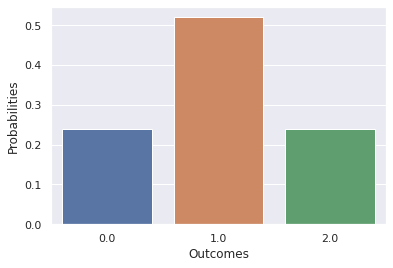

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()


# repeat the experiments multiple times to get a better result of probabilities
num_experiments = 100

# saves the number of tails got from each run of the experiment
total_num_tails = np.zeros(num_experiments)

for i in range(num_experiments):
    
    # simulate flipping two coins at once
    outcome1 = np.random.choice(["H", "T"])
    outcome2 = np.random.choice(["H", "T"])
    
    # counting frequency of tails from outcome 1 and 2
    if outcome1 + outcome2 == "HH":
        num_tails = 0
    
    elif outcome1 + outcome2 == "HT" or outcome1 + outcome2 == "TH":
        num_tails = 1
        
    else:
        num_tails = 2
    
    # saves the number of tails from each experiment at different indices
    total_num_tails[i] = num_tails
    
outcome_values, outcome_count = np.unique(total_num_tails, return_counts=True)
print(f"Outcome values: {outcome_values}")
print(f"Outcome counts: {outcome_count}")

# calculate the probability of each outcome
#  element wise division
prob_count = outcome_count / len(total_num_tails) # same as: np.divide(outcome_count, len(total_num_tails))
print(f"Count probabilities: {prob_count}") 
    
sns.barplot(x=outcome_values, y=prob_count)
plt.xlabel("Outcomes")
plt.ylabel("Probabilities")
plt.show()

# Probability Density Function (PDF)

The **`probability density function`** is the probability distribution of a `continuous random variable`.

**Continuous random variables** have an infinite number of points. Thus, the **chances of ocurrence** of exactly **one value** would be `0` probability.
- For example, height can be measured in meters or cm. So there can be an infinite amount of values between two heights, lets say **170** and **171**

Because of this, instead of selecting a single value, we are **generally interested in a `range of values`**.

- For example, we may be interested in selecting people whose heights are $165 \le x \le 175$

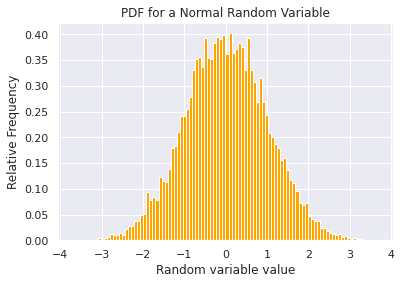

In [14]:
from scipy.stats import norm


#! norm.rvs generates random values, as well as calculates the pdf?
#? norm.pdf method gets used on already existing data
# generate random numbers from a normal probability density function
mean = 0
std = 1
norm_pdf = norm.rvs(size=10000, loc=mean, scale=std)

plt.hist(norm_pdf, bins=100,density=1, color = 'Orange')
plt.xlabel("Random variable value")
plt.ylabel("Relative Frequency")
plt.title("PDF for a Normal Random Variable")
plt.show()

# Computing the Expected Value

To find the **expected value**, denoted as $\mu$, we take the average of all possible outcomes.

For `six dice rolls`:

<font size="5">$\mu = E(X) = (1)(\frac{1}{6})+(2)(\frac{1}{6})+ (3)(\frac{1}{6})+ (4)(\frac{1}{6})+ (5)(\frac{1}{6})+ (6)(\frac{1}{6}) = 3.5$</font>

In [15]:
samplespace = np.arange(6)+1 # six dice rolls
print(f"{samplespace = }")

print(f"Mean: {np.mean(samplespace)}")

#!the only difference between these two functions is that
#! np.average can take a weight argument. Otherwise, they are identical
print(f"Average: {np.average(samplespace)}")


samplespace = array([1, 2, 3, 4, 5, 6])
Mean: 3.5
Average: 3.5


# Bernoulli

The **`bernoulli`** distribution is a discrete probability distribution that can only take two possible values: `1` for **success** and `0` for **failure**

A single experiment with two possible outcomes is called a `bernoulli trial`.

The **`Bernoulli distribution`** is a calculation that allows you to **create a model for the set of possible outcomes** of a `Bernoulli trial`. 


<font size="4">$P(Success) = p$</font>

<font size="4">$P(Failure) = 1 - p$</font>

**`Probability Mass Function`**:

$$ f(x) =   \left\{
\begin{array}{ll}
      p^x(1-p)^{1-x} & if \; x = 0,1 \\
      0 & otherwise\\
\end{array} 
\right.  $$

## Conditions for Bernoulli

1. There is only `one trial`
2. There are only **two possible outcomes** from the trial
3. Each of the two outcomes has a **fixed probability** of occurring
4. Trials are **entirely independent** of each other

------

The following snippet of code visualizes the Bernoulli distributions for a fair and unfair coin toss.

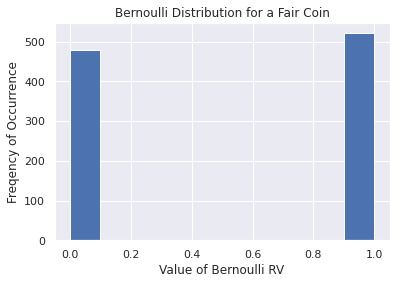

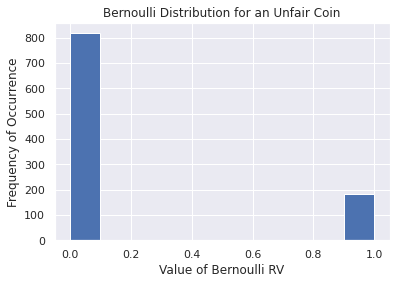

In [16]:
from scipy.stats import bernoulli

num_tosses = 1000

# p = 0.5 is for fair coin (.5 heads, .5 tails), any other is unfair 
fair_coin = bernoulli.rvs(p=0.5, size=num_tosses)
plt.hist(fair_coin)
plt.title("Bernoulli Distribution for a Fair Coin")
plt.xlabel("Value of Bernoulli RV")
plt.ylabel("Freqency of Occurrence")
plt.show()

unfair_coin = bernoulli.rvs(p=0.2, size=num_tosses)
plt.hist(unfair_coin)
plt.title("Bernoulli Distribution for an Unfair Coin")
plt.xlabel("Value of Bernoulli RV")
plt.ylabel("Frequency of Occurrence")
plt.show()


# Binomial distribution

The **`binomial distribution`** is like the **bernoulli**, but for $\ge$ `1 trial`. 

A **`binomial distribution`** can be thought of as simply the probability of a **SUCCESS** or **FAILURE** outcome in an experiment or survey that is **repeated multiple times**.

Like the **bernoulli**, there are only `two possible outcomes`.

<font size="5">$f(k,n,p) = P(X=k) = \begin{pmatrix}n\\k\end{pmatrix}p^k(1 - p)^{n-k}$</font>

**where**:
- $n$ - number of trials
- $k$ - number of successes

To find $k$ in $n$ trials, we do:

<font size = "5">$\begin{pmatrix}n\\k\end{pmatrix} = \frac{n!}{k!(n - k)!}$</font>

-----

Below contains code for the finding the probability of **getting exactly 10 heads** when a coin is **repeatedly tossed 20 times**

Number of successes in each trial having 20 coin tosses: 
[ 8 12  9 14  9 10 15 10  8 11 13  9 10  9 14  9  8 13 10  7 10 11 11 13
  7  8 12  9 10  5 13  9 10  5  8  7 12 14  4 12 13  9 10 12 16 16 13 10
 14  8  6 15  9  6 11 12  7  8 12  7  8  7 13  8 11  9 14  9 11  6 10 10
  6 13 10  9 10  7 11 13 13  9 10 11  9 10 12  9 13  8 10 12  5  9 12 11
 10 10 11 10]



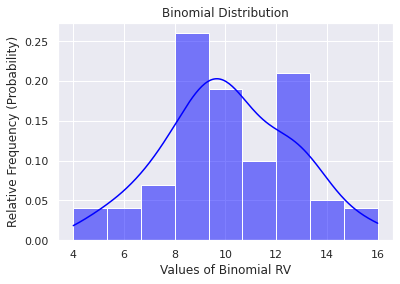

In [17]:
from scipy.stats import binom
 
# n = number of trials
# p = probability of success
# loc = mean
# size = total runs of the experiment
binom_vr = binom.rvs(n=20, p=0.5, loc=0, size=100)
print(f"Number of successes in each trial having 20 coin tosses: \n{binom_vr}\n")

# linewidth specifies the width of bars
# alpha is used to adjust color strength
ax = sns.histplot(binom_vr, color="blue", kde=True, stat="probability")

ax.set(xlabel="Values of Binomial RV", ylabel="Relative Frequency (Probability)", title = "Binomial Distribution")
plt.show()

# Continuous Uniform Distribution

----
`Note`: there are both **continuous** and **discrete** uniform distributions. This cell only covers **continuous**.

----

A **`continuous uniform distribution`** has a single value $\frac{1}{(b - a)}$, which occurs in a certain range $[a,b]$

Everything outside of that range is `0`.

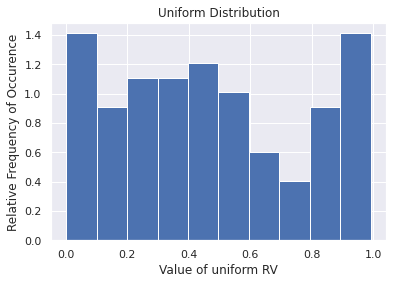

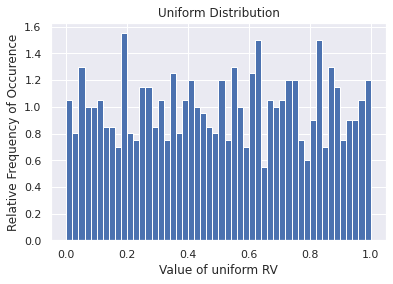

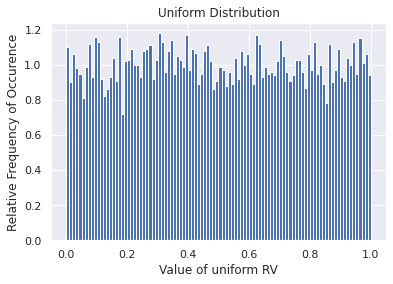

In [19]:
from scipy.stats import uniform

# generating 100 samples of a uniform RV
uniform_rv1 = uniform.rvs(size=100)
plt.hist(uniform_rv1, density=1) # density normalizes the freq of occurence
plt.title("Uniform Distribution")
plt.xlabel("Value of uniform RV")
plt.ylabel("Relative Frequency of Occurence")
plt.show()

# generating 1000 samples of a uniform RV
uniform_rv2 = uniform.rvs(size=1000)
plt.hist(uniform_rv2, bins=50, density=1) 
plt.title("Uniform Distribution")
plt.xlabel("Value of uniform RV")
plt.ylabel("Relative Frequency of Occurence")
plt.show()

# generating 10000 samples of a uniform RV
uniform_rv3 = uniform.rvs(size=10000)
plt.hist(uniform_rv3, bins=100, density=1,)
plt.title("Uniform Distribution")
plt.xlabel("Value of uniform RV")
plt.ylabel("Relative Frequency of Occurence")
plt.show()



# Gaussian (Normal) Distributions

The **`Gaussian distribution`** is the most common distribution pattern seen, which is why its also called `normal`

This distribution is defined by its **mean** and **standard deviation**:

- `Mean` - the data values are spread around the mean
- `Std` - the standard deviation controls the spread of the data. **Smaller** `std` = **highly concentrated** around the mean, vice versa

`Gaussian distributions` operate over **continuous data**

If the normal distribution has **mean=0** and **std=1**, its called a **`standard normal distribution`**

### PDF:

<font size="5">$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x - \mu}{\sigma}^2)}$</font>

50 samples drawn from normal distribution:
Mean: 0.05693958229236987
Std: 0.958188556622902
[ 0.98776439  0.97740797  0.65681949 -0.24805941  1.10880491 -0.45288803
 -0.46167353  1.39466292 -0.4242758  -0.05249126  0.92000267  0.30864433
  0.56611175 -0.81166865 -1.14693182  2.00067159 -0.00545876 -1.78185851
  0.5277514   0.0144253   0.74040177 -0.20264102  0.81335462  0.7746623
 -1.28659406  1.13668038  0.10365422  1.93869054  1.98411805  0.2655979
 -0.67561273  1.0742682   0.02531846 -0.32249185 -1.55261424 -1.50127598
 -1.82254308 -0.15926561 -0.15889342 -0.62978877  0.41349856 -1.26105945
  0.9630915  -0.28064023 -0.60537145  0.86561465  0.54462811 -0.58469092
 -1.27239705 -0.55848127]


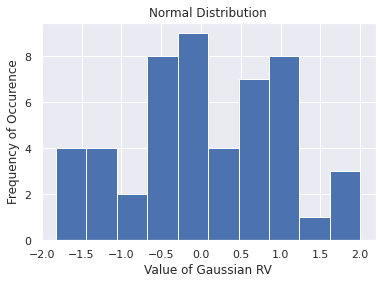

Since the number of samples is small, the distribution does not look mush like a bell curve


In [32]:
from scipy.stats import norm

# generate a gaussian distribution variable having 50 samples
norm_vr1 = norm.rvs(size=50)
mean1 = np.mean(norm_vr1)
std1 = np.std(norm_vr1)
print(f"50 samples drawn from normal distribution:\nMean: {mean1}\nStd: {std1}\n{norm_vr1}")

plt.hist(norm_vr1)
plt.title("Normal Distribution")
plt.xlabel("Value of Gaussian RV")
plt.ylabel("Frequency of Occurence")
plt.show()
print("Since the number of samples is small, the distribution does not look mush like a bell curve")



5000 samples drawn from normal distribution:
Mean: 10.037307140266119
Std: 5.011589035334904
[10.82628031 11.81459837 17.79885057 ... 14.55366927  6.74489589
 -3.67828715]


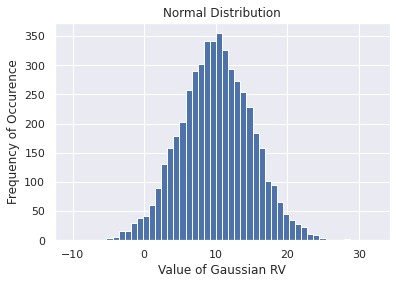

With more data, the distribution gains its signature bell curve


In [39]:

# loc = mean = 10
# scale = std = 5
norm_vr2 = norm.rvs(size=5000, loc=10, scale = 5)
mean2 = np.mean(norm_vr2)
std2 = np.std(norm_vr2)
print(f"5000 samples drawn from normal distribution:\nMean: {mean2}\nStd: {std2}\n{norm_vr2}")

plt.hist(norm_vr2, bins=50,)
plt.title("Normal Distribution")
plt.xlabel("Value of Gaussian RV")
plt.ylabel("Frequency of Occurence")
plt.show()
print("With more data, the distribution gains its signature bell curve")

# Poisson Distribution

A **`Poisson distribution`** is used to estimate the **number of times** an event can occur **within some specified time**.

`Poisson distributions` operate over **discrete random variables**

The shape has a uniform spread in both directions, similar to a **normal distribution**. However, the more *skewed* the data is, the less uniform it becomes.

Some examples of `Poisson distributions`:
1. \# of users visiting a website during an interval of time
2. \# of cars passing a portion of road during a specific interval of time



### PMF:

<font size="5">$f(k,\mu) = P(X = k) = \frac{\mu^ke^{-\mu}}{k!}$</font>

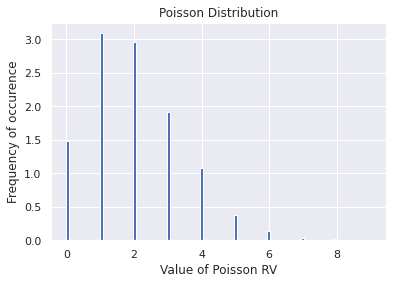

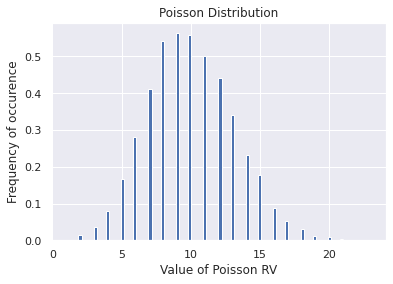

In [41]:
from scipy.stats import poisson

poisson_rv1 = poisson.rvs(mu=2, size=10000)
plt.hist(poisson_rv1, bins=100, density=1)
plt.title("Poisson Distribution")
plt.xlabel("Value of Poisson RV")
plt.ylabel("Frequency of occurence")
plt.show()

poisson_rv2 = poisson.rvs(mu=10, size=10000)
plt.hist(poisson_rv2, bins=100, density=1)
plt.title("Poisson Distribution")
plt.xlabel("Value of Poisson RV")
plt.ylabel("Frequency of occurence")
plt.show()